# Enscheidungsbäume (Decision Trees)

Ein Entscheidungsbaum ist ein Modell zur Entscheidungsfindung, das Daten durch eine Reihe von Bedingungen in verschiedene Kategorien oder Werte unterteilt. Er besteht aus folgenden Hauptelementen:

* __Wurzelknoten__: Der Startpunkt des Baums, an dem die erste Entscheidungsregel angewendet wird.
* __Innere Knoten__: Diese repräsentieren Bedingungen, die die Daten weiter aufteilen.
* __Blätter__ (Endknoten): Diese enthalten die endgültige Entscheidung oder Vorhersage

 
Der Entscheidungsbaum wird durch einen rekursiven Prozess erstellt:

Zuerst wird das Kriterium mit der höchsten Trennkraft (z. B. die Variable, die den besten Informationsgewinn bietet) als erste Entscheidungsregel gewählt. Die Daten werden entsprechend dieser Regel aufgeteilt. Dieser Prozess wird für jede neu entstandene Gruppe wiederholt, bis eine Stoppregel greift (z. B. keine signifikanten Verbesserungen mehr möglich oder eine Mindestanzahl an Datenpunkten erreicht wurde).

## Beispiel: Schätzung eines Hauspreises

Uns liegt eine Tabelle von Preisen vor, für die in den letzten Jahren Häuser verkauft wurden. Sie enthält auch viele verschiedenen Features, wie Lage, Anzahl der Stockwerke, Größe, Anzahl der Raume etc. Gesucht ist ein Entscheidungsbaum, mit dem wir aufgrund der Features eines Hause dessen preis abschätzen können.

Wir verwenden nur wenige Features, damit die Analyse nicht zu komplex wird. Die Auswahl der Features ist sicher auch eine der Aufgaben des Data Scientists, die durch das Fachwissen unterstützt werden muss.

### Laden der Daten

Wir verwenden den Datensatz aus der Datei `hauspreise.csv`. Dies ist eine Beispieldatei aus dem Internet ("Hauspreise in Iowa") mit 1460 Datensätzen und 79 Features.

In [2]:
import pandas as pd

houses = pd.read_csv('hauspreise.csv', index_col='Id')
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Vorbereitung der Daten
Wir wählen nur drei Parameter (Features) - Fläche, Baujahr, Anzahl der Räume - für das Haus sowie den Verkaufspreis aus. Außerdem entfernen wir alle Zeilen mit fehlenden Daten.

In [3]:
features = ['GrLivArea', 'YearBuilt', 'TotRmsAbvGrd', 'SalePrice']
houses = houses[features]

houses.dropna(subset=['GrLivArea', 'YearBuilt', 'TotRmsAbvGrd', 'SalePrice'], axis=0, inplace=True)

### Umbenennen der Features

Wir arbeiten lieber mit deutschen Bezeichnungen und benennen die Spalten für die weitere Bearbeitung um. Das ist natürlich nicht notwendig, aber es geht ganz einfach mit einem `dict`:

In [3]:
houses = houses.rename(columns={'GrLivArea': 'Fläche', 'YearBuilt': 'Baujahr', 'TotRmsAbvGrd' : 'AnzahlRäume', 'SalePrice' : 'Verkaufspreis' })
houses

,Fläche,Baujahr,AnzahlRäume,Verkaufspreis
Id,,,,
1,1710,2003,8,208500
2,1262,1976,6,181500
3,1786,2001,6,223500
4,1717,1915,7,140000
5,2198,2000,9,250000
...,...,...,...,...
1456,1647,1999,7,175000
1457,2073,1978,7,210000
1458,2340,1941,9,266500


### Zerlegung in Trainings- und Testdaten

Wie üblich zerlegen wir die daten in einen Trainings- und einen Testbereich:

In [10]:
from sklearn.model_selection import train_test_split

X, y = houses.drop('Verkaufspreis', axis=1), houses.Verkaufspreis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)


Damit sind die Vorbereitungen abgeschlossen. Die großen Werte bei der Wohnfläche geben keine $m^2$-Werte an, sondern _Quadrat-Fuß_. Also alles ungefähr durch 10 teilen.

## Der Entscheidungsbaum

Wir erstellen einen Entscheidungsbaum durch Eingabe der vorbereiteten Daten:

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

## Bewertung des Entscheidungsbaums
Wir bewerten den Entscheidungsbaum mit dem __mittleren absoluten Fehler__ auf den Testdaten

In [8]:
from sklearn.metrics import mean_absolute_error

pred = model.predict(X_test)
mae = mean_absolute_error(pred, y_test)
print("Mean Absolute Error: {:_.0f}".format(mae))

Mean Absolute Error: 38_586


## Anzeige des Entscheidungsbaums

Mit `sklearn` kann man sich den Entshceidungsbaum auch anzeigen lassen. Dabei wir aus der Grafik bei grßen Datenmengen schnell eine Tapete und dauert entsprechend lange

Zu Demonstrationszwecken verkleinerr wir den Entscheidungsbaum, indem wir nur wenige Trainingsdaten verwenden. 

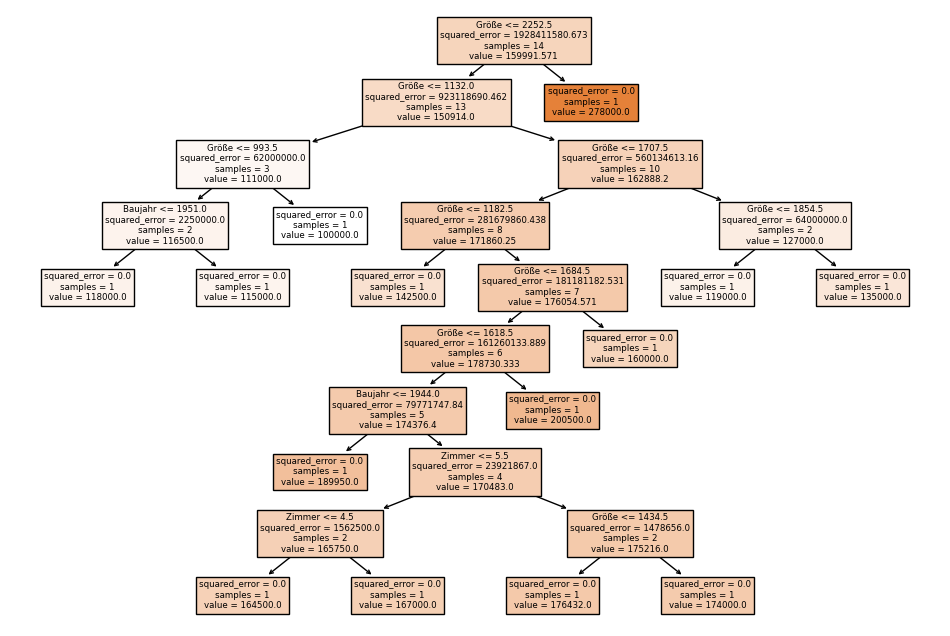

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

model_small = DecisionTreeRegressor(random_state=19)
model_small.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(model_small, feature_names=['Größe', 'Baujahr', 'Zimmer'], filled=True)
plt.show()

Dieser Baum ist schon recht übersichtlich. Man kann jetzt herumprobieren, indem man die Werte für `random_state` verändert. Der Baum erscheint dann immer anders. Manchmal ist der Wurzelknoten das Baujar, ein anders Mal die Wohnfläche usw.